<a href="https://colab.research.google.com/github/mertgulgel/MachineVisionHW4/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import *
import zipfile
import os

In [ ]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
IMAGE_SIZE = (64, 64)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    '/content/Dog and Cat .png',
    validation_split=.2,
    subset = 'training',
    seed = 42,
    image_size = IMAGE_SIZE,
    batch_size = batch,
    label_mode = 'categorical'
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
validation = keras.preprocessing.image_dataset_from_directory(
    '/content/Dog and Cat .png',
    validation_split=.2,
    subset = 'validation',
    seed = 42,
    image_size = IMAGE_SIZE,
    batch_size = batch,
    label_mode = 'categorical'
)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [ ]:
def display_samples(dataset, n_samples, classes_name):
  plt.figure(figsize=(10,10))
  for images, labels in train.take(1):
    for i in range(n_samples):
      ax = plt.subplot(3, 3, i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(classes_name[np.argmax(labels[i])])
      plt.axis("off")

(64, 64, 3)


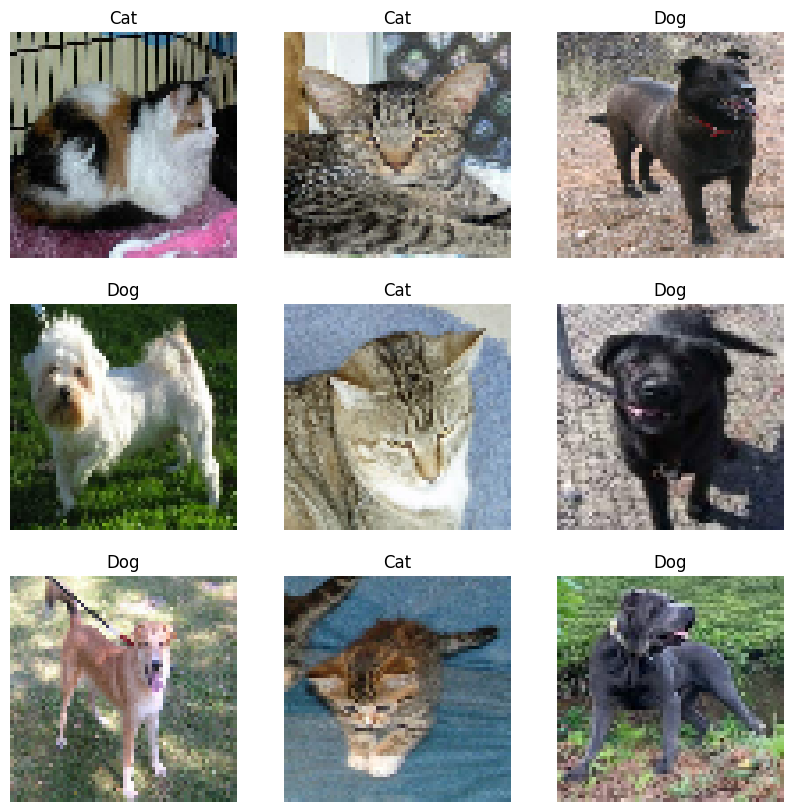

In [ ]:
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
  for i in range(1):
    print(images[i].shape)

In [ ]:
input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=IMAGE_SIZE + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)        

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"]
)
epochs = 8
model.fit(
    train,
    epochs=epochs,
    validation_data = validation
);

Epoch 1/8
25/25 [==============================] - 13s 376ms/step - loss: 1.0003 - accuracy: 0.5512 - val_loss: 4.9173 - val_accuracy: 0.4950
Epoch 2/8
25/25 [==============================] - 11s 393ms/step - loss: 0.9407 - accuracy: 0.5600 - val_loss: 1.2514 - val_accuracy: 0.5300
Epoch 3/8
25/25 [==============================] - 15s 575ms/step - loss: 0.8554 - accuracy: 0.5875 - val_loss: 1.8414 - val_accuracy: 0.4950
Epoch 4/8
25/25 [==============================] - 14s 498ms/step - loss: 0.7839 - accuracy: 0.6500 - val_loss: 1.7675 - val_accuracy: 0.4950
Epoch 5/8
25/25 [==============================] - 18s 665ms/step - loss: 0.7306 - accuracy: 0.6513 - val_loss: 0.6964 - val_accuracy: 0.6250
Epoch 6/8
25/25 [==============================] - 16s 584ms/step - loss: 0.6870 - accuracy: 0.6913 - val_loss: 0.8086 - val_accuracy: 0.5900
Epoch 7/8
25/25 [==============================] - 15s 536ms/step - loss: 0.6040 - accuracy: 0.7387 - val_loss: 0.8517 - val_accuracy: 0.5950
Epoch 

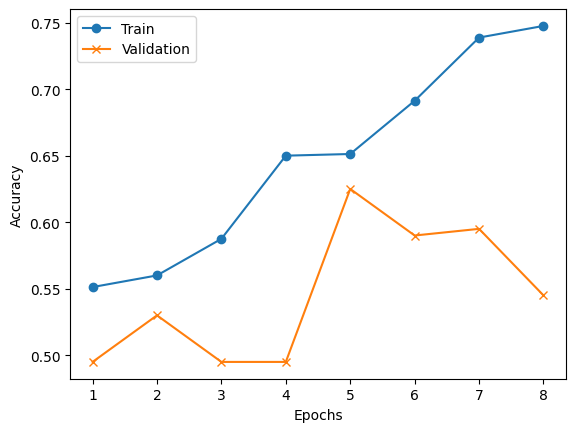

In [ ]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()